# Series de tiempo



In [2]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

Algunas veces la teoría clásica de series de tiempo le gana a las redes neuronales, por lo que usualmente lo mejor es aplicar teoría clásica y a los resultados de la teoría clásica aplicarles redes neuronales.

In [3]:
!ls

TimeSeries_1.ipynb	       archive	faces	models
TimeSeries_H1Visualizar.ipynb  data	images	mydata


In [4]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv'); df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv', index_col='Date')

In [6]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [7]:
df.index

Index(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
       '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
       ...
       '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
       '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30', '1990-12-31'],
      dtype='object', name='Date', length=3650)

Dado que no esta tomando las fechas con un formato de fecha, volvemos a cargar y parseamos por fecha. 

In [8]:
df = pd.read_csv('/notebooks/storage/mydata/daily-min-temperatures.csv', index_col='Date', parse_dates=True)

In [9]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [10]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [11]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [12]:
# Ahora que ya detecta como fecha el index
# podemos hacer algo como: 

df['1985-01-01': '1986-01-01']
# Que nos da fechas por intervalos

,Temp
Date,
1985-01-01,13.3
1985-01-02,15.2
1985-01-03,13.1
1985-01-04,12.7
1985-01-05,14.6
...,...
1985-12-28,10.8
1985-12-29,12.0
1985-12-30,16.3


# Vizualización en pandas

Lo ideal es que siempre que tienes un nuevo dataset debes explorarlo y entenderlo. Ver el formato de los datos, que significa cada columnas, etc. 

<AxesSubplot:ylabel='Frequency'>

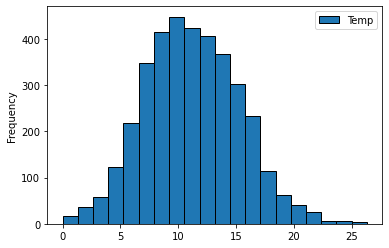

In [13]:
df.plot.hist(edgecolor='k', bins=20)
# Observamos la distribución de las temperaturas
# Parecen tener una distribución normal

<AxesSubplot:xlabel='Date'>

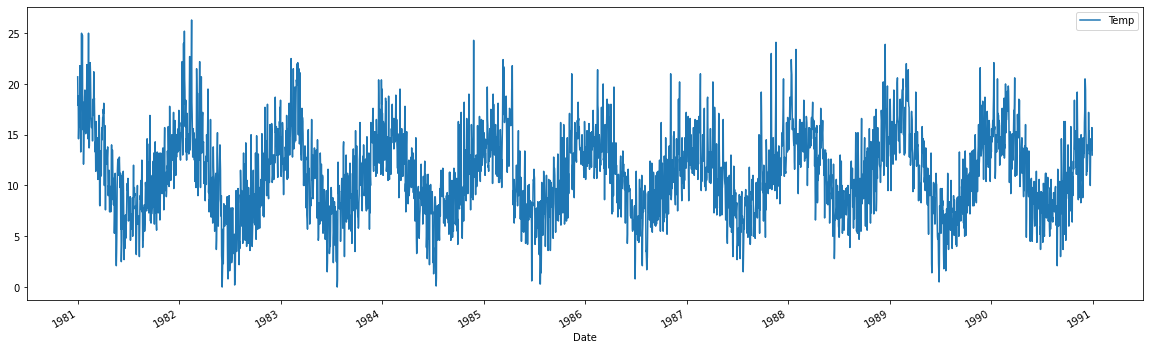

In [14]:
df.plot.line(y='Temp', figsize=(20,6))
# Tiene sentido ver el siguiente patrón 
# dadas las estaciones del año
# invierno baja, verano sube

<AxesSubplot:xlabel='Date'>

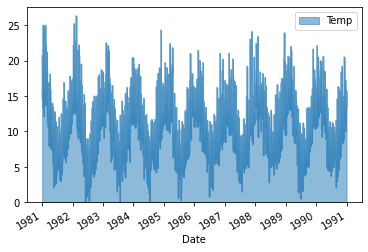

In [15]:
df.plot.area(alpha=0.5)
# Este es similar al anterior sólo que rellena 
# el área de abajo

<AxesSubplot:>

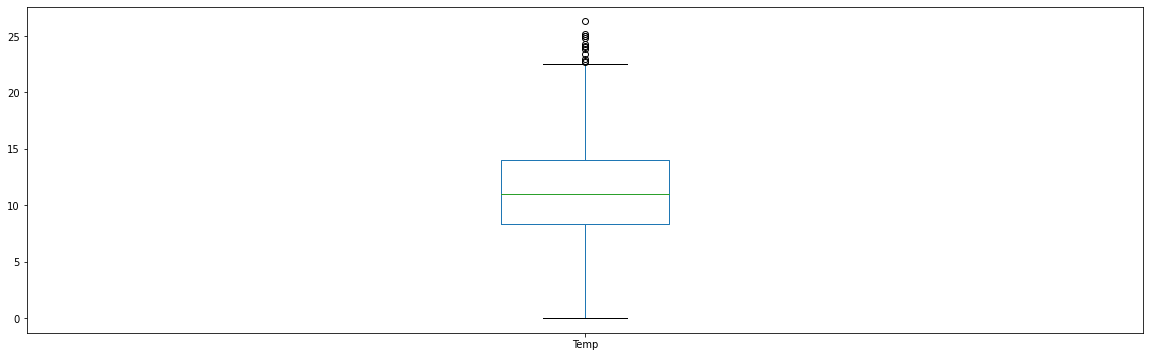

In [16]:
df.plot.box(figsize=(20,6))
# Gráfica de caja, con el máximo y minímo

<AxesSubplot:ylabel='Density'>

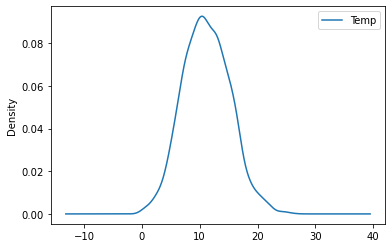

In [17]:
df.plot.kde()

# Agregando columnas

Digamos que ahora queremos añadir la columna "mes"

In [18]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [19]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=3650)

In [20]:
df['Mes'] = df.index.month

In [21]:
df.head()

,Temp,Mes
Date,,
1981-01-01,20.7,1
1981-01-02,17.9,1
1981-01-03,18.8,1
1981-01-04,14.6,1
1981-01-05,15.8,1


In [22]:
# agrupamos por mes
por_mes = df.groupby('Mes').mean()

In [23]:
por_mes.sort_index()

,Temp
Mes,
1,15.030323
2,15.373759
3,14.565484
4,12.088333
5,9.866452
6,7.278333
7,6.692581
8,7.891290
9,8.976333


<AxesSubplot:xlabel='Mes'>

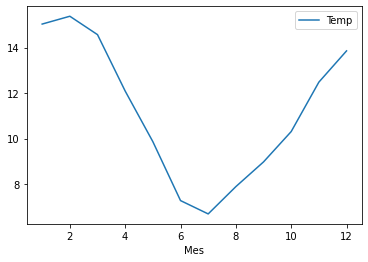

In [24]:
# Si queremos visualizarlo hacemos: 
df.groupby('Mes').mean().plot.line()

In [25]:
df['Año'] = df.index.year

In [26]:
df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [27]:
temp_mensual = df.groupby(['Año', 'Mes']).mean()

<AxesSubplot:xlabel='Año,Mes'>

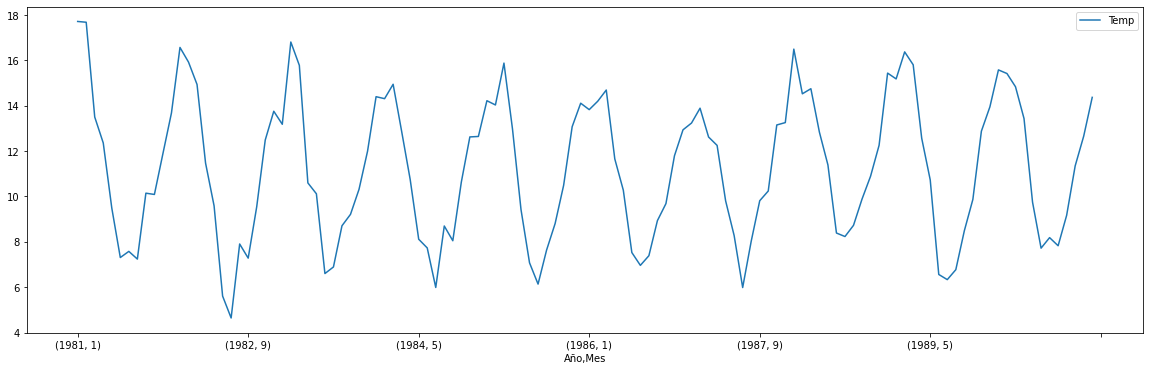

In [28]:
# Si queremos ver la temperatura mensual promedio hacemos:
temp_mensual.plot.line(figsize=(20,6))
# Esta gráfica es similar a la realizada con:
# df.plot.line(y='Temp', figsize=(20,6))
# Pero aquí tenemos menos ruido debido a que 
# estamos usando el promedio

In [29]:
# Si queremos ver la temperatura promedio por año
# hacemos: 
temp_anual = df.groupby(['Año']).mean()

<AxesSubplot:xlabel='Año'>

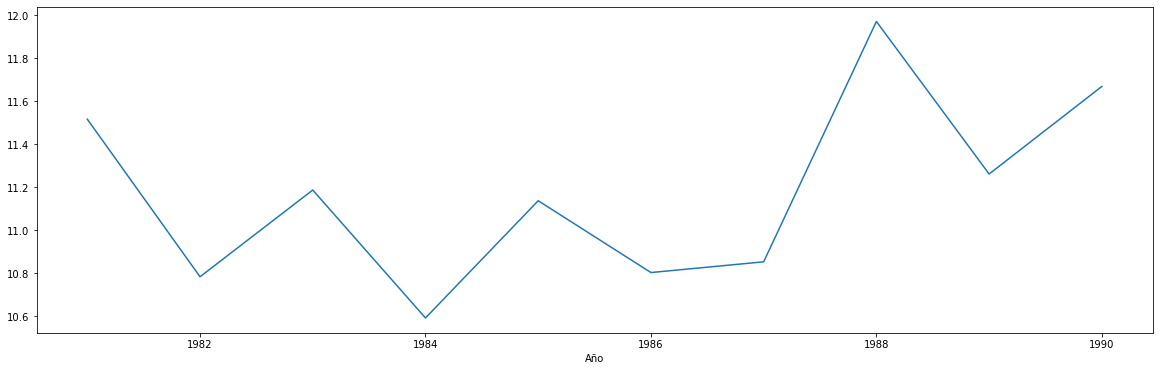

In [30]:
temp_anual['Temp'].plot.line(figsize=(20,6))


* Para categóricas: bar, barh
* Para ver relaciones entre variables: scatter, con s (size) y c (color), alpha, etc.

<h1><a id = "2da"> Primera regla de series de tiempo: Valida con lo <strong>último</strong>, no con aleatorios </a></h1>

In [31]:
df=df.sort_index()

In [32]:
df.head(5)

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [33]:
len(df)

3650

In [34]:
train_df = df[:3285]
valid_df = df[3285:]

In [35]:
train_df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


# Baselines

Lo primero que tenemos que hacer es establecer las baselines. Tenemos dos baselines "estándar" para series de tiempo: 

1. Promedio 
2. Repite última 

A veces funciona mejor una y a veces otra. En el caso de la temperatura: ¿Qué crees que funcione mejor? Para discutir: ¿En qué casos creen que funcione mejor una y en qué casos la otra? 


En el caso de querer predecir la temperatura de mañana, una
cosa que podríamos hacer es decir _"la temperatura de mañana 
va  a ser igual a la de hoy"_ -> **Repite última** 

Otra cosa que podríamos hacer diferente es decir, _"la temperatura de mañana es el promedio de todas las temperaturas anteriores"_ -> **Promedio**


> Antes de modelar debes de establecer las baselines, porque si tu modelo no le gana a las baselines. El modelo no sirve para nada. 


# Repite Última

In [36]:
df.head()

,Temp,Mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981


In [37]:
df['Temp'].shift(1) # Mueve uno hacia adelante a mis datos

Date
1981-01-01     NaN
1981-01-02    20.7
1981-01-03    17.9
1981-01-04    18.8
1981-01-05    14.6
              ... 
1990-12-27    14.6
1990-12-28    14.0
1990-12-29    13.6
1990-12-30    13.5
1990-12-31    15.7
Name: Temp, Length: 3650, dtype: float64

In [38]:
df['ultima_temp'] = df['Temp'].shift(1)

In [39]:
df.head()

,Temp,Mes,Año,ultima_temp
Date,,,,
1981-01-01,20.7,1,1981,NaN
1981-01-02,17.9,1,1981,20.7
1981-01-03,18.8,1,1981,17.9
1981-01-04,14.6,1,1981,18.8
1981-01-05,15.8,1,1981,14.6


<AxesSubplot:xlabel='ultima_temp', ylabel='Temp'>

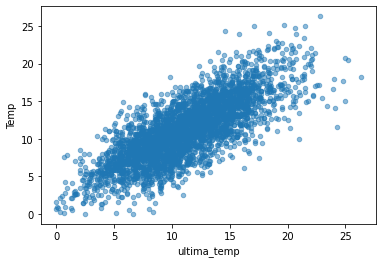

In [41]:
df.plot.scatter(x='ultima_temp', y = 'Temp', alpha=0.5)

<AxesSubplot:xlabel='Date'>

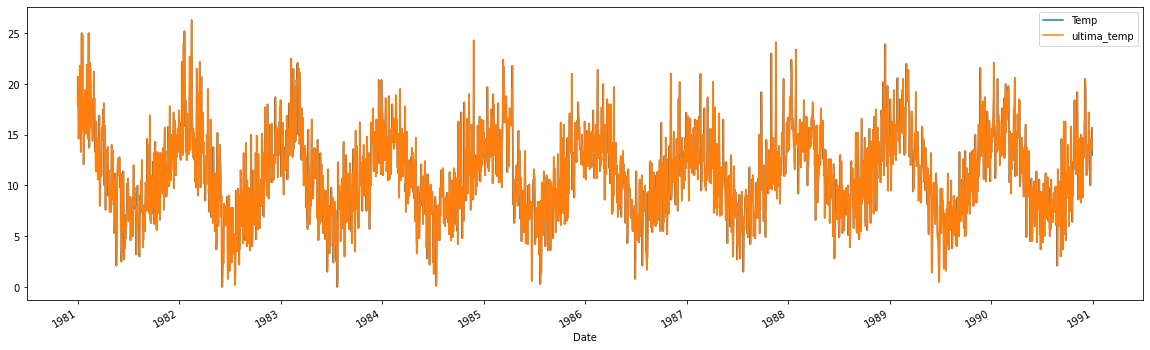

In [42]:
df[['Temp', 'ultima_temp']].plot.line(figsize=(20,6))

<AxesSubplot:xlabel='Date'>

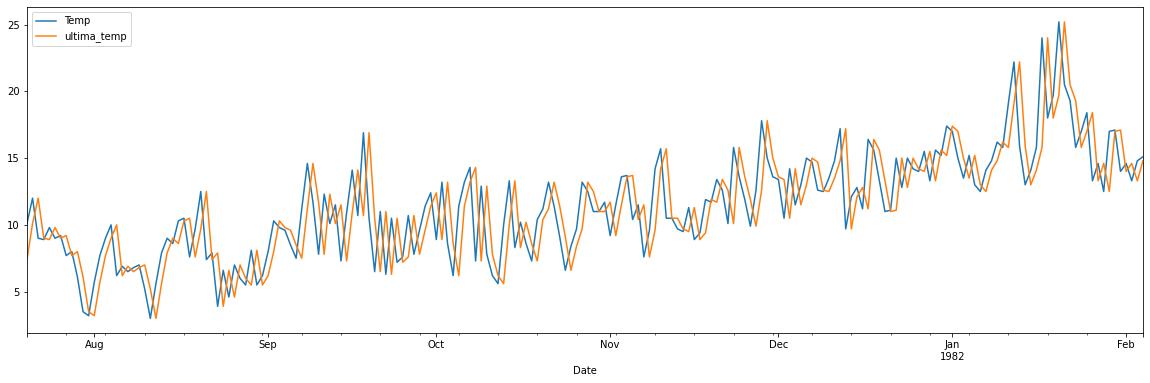

In [43]:
df[['Temp', 'ultima_temp']][200:400].plot.line(figsize=(20,6))

> Como se observa, se "enciman" -> la última temperatura y la anterior son las mismas. 

Esta podría ser una buena manera de corroborar que estas trabajando con la baseline correcta. 

In [45]:
valid_df = df[3285:]

In [46]:
# Calculamos el error
error_ultima = np.mean(np.abs(valid_df['Temp'] - valid_df['ultima_temp']))
error_ultima

2.024931506849315

In [48]:
def error_l1(df, colA, colB, init_step): 
    """Función para calcular el error l1
    """
    valid_df = df[init_step:]
    return np.mean(np.abs(valid_df[colA] - valid_df[colB]))

In [49]:
error_l1(df, 'Temp', 'ultima_temp', 3285)

2.024931506849315

In [50]:
def error_rmse(df, colA, colB, init_step): 
    """Función para calcular el error rmse
    """
    valid_df = df[init_step:]
    return np.sqrt(np.mean(np.square(valid_df[colA] - valid_df[colB])))

In [51]:
error_rmse(df, 'Temp', 'ultima_temp', 3285)

2.5824009217292243

# Promedio

En cada medición quiero encontrar el promedio de todo lo anterior. Para esto vamos a usar el método _expanding_ en pandas


In [52]:
df['Temp'].expanding()
# Lo va a hacer cumulativo

Expanding [min_periods=1,center=False,axis=0]

In [53]:
df['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [54]:
df['Temp'].expanding().mean()
# o sea, al poner mean. Me va a dar el promedio 
# hasta cada punto (observa la linea anterior)

# En este caso, al final el promedio se queda muy 
# constante

Date
1981-01-01    20.700000
1981-01-02    19.300000
1981-01-03    19.133333
1981-01-04    18.000000
1981-01-05    17.560000
                ...    
1990-12-27    11.174712
1990-12-28    11.175377
1990-12-29    11.176014
1990-12-30    11.177254
1990-12-31    11.177753
Name: Temp, Length: 3650, dtype: float64

In [ ]:
df

Quiero el promedio de lo anterior, o sea, si quieres predecir algo
no quieres usar ese promedio (sería como hacer trampa) sino el promedio de todo lo anterior
para poder predecir el futuro, entonces hacemos: 

In [56]:
df['promedio_temp'] = df['Temp'].expanding().mean().shift(1)

In [57]:
df

,Temp,Mes,Año,ultima_temp,promedio_temp
Date,,,,,
1981-01-01,20.7,1,1981,NaN,NaN
1981-01-02,17.9,1,1981,20.7,20.700000
1981-01-03,18.8,1,1981,17.9,19.300000
1981-01-04,14.6,1,1981,18.8,19.133333
1981-01-05,15.8,1,1981,14.6,18.000000
...,...,...,...,...,...
1990-12-27,14.0,12,1990,14.6,11.173937
1990-12-28,13.6,12,1990,14.0,11.174712
1990-12-29,13.5,12,1990,13.6,11.175377


<AxesSubplot:xlabel='Date'>

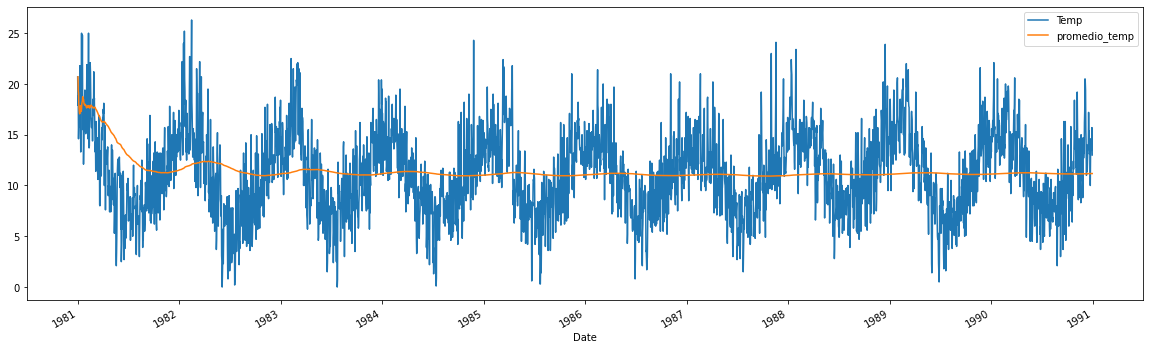

In [58]:
df[['Temp', 'promedio_temp']].plot.line(figsize=(20,6))

In [63]:
error_l1(df, 'promedio_temp', 'Temp', 3285)

3.2301969509798254

In [62]:
error_rmse(df, 'promedio_temp', 'Temp', 3285)

3.8915659620656644

# Moving average